In [ ]:
Q1. What is the relationship between polynomial functions and kernel functions in machine learning
algorithms?

In [ ]:
A1. Kernel functions allow SVMs to learn non-linear decision boundaries by transforming data into higher 
    dimensional feature spaces. 
    Polynomial functions are a common type of kernel function used in SVMs.
    A polynomial kernel of degree d transforms the data into a d dimensional feature space.
    It allows the SVM to learn a polynomial decision boundary of degree d.
    The polynomial kernel function is defined as K(x,y) = (x.y+1)^d
    Choosing higher d allows modeling more complex non linear relationships.

In [ ]:
Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x,y=make_circles(n_samples=100,noise=0.1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
poly_svm=SVC(kernel='poly',degree=3)
poly_svm.fit(x_train,y_train)

SVC(kernel='poly')

In [4]:
y_pred=poly_svm.predict(x_test)

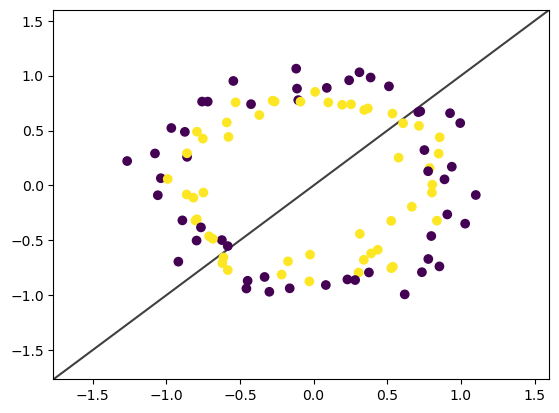

In [5]:
plt.scatter(x[:,0],x[:,1],c=y)
ax=plt.gca()
lims=[np.min(x)-0.5,np.max(x)+0.5]
ax.plot([lims[0],lims[1]],[lims[0],lims[1]],'k-',alpha=0.75,zorder=0)
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

In [ ]:
Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

In [ ]:
A3. The epsilon parameter controls the width of the epsilon insensitive tube around the regression function.
    Support vectors are those training points that lie outside the epsilon tube and have non zero loss. A 
    larger epsilon creates a wider tube so fewer points will fall outside this tube. The far away points are
    no longer needed to define the regression tube. So a high epsilon will result in fewer training points 
    becoming support vectors.
    
    In SVR, epsilon controls the width of the tube around the regression line.
    Larger epsilon -> wider tube -> fewer points outside tube -> fewer support vectors.
    Smaller epsilon -> narrower tube -> more points outside tube -> more support vectors.

In [ ]:
Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter
affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works
and provide examples of when you might want to increase or decrease its value?

In [ ]:
A4. Kernel function:
    Specifies the type of similarity measure used to compare training examples like linear, polynomial, RBF,
    sigmoid. 
    Linear kernel is simple but cannot model nonlinear relationship. RBF is good default choice.
    Polynomial/sigmoid kernels can overfit if degree/coefficients are too high.
    
    C parameter:
    Higher C aims to minimize the training error, lower C regularizes more to prevent overfitting.
    Lower C if model is overfitting, higher C if underfitting. Default C = 1.
    
    Epsilon:
    Specifies the tube size around the regression line in epsilon.
    Larger epsilon -> simpler model, fewer support vectors. Smaller epsilon may overfit.
    Default epsilon is 0.5.
    
    Gamma:
    Kernel coefficient for RBF, polynomial, sigmoid kernels.
    Higher gamma -> narrower, peaked similarity shape. Lower gamma -> wider, flatter shape.
    Small dataset or noisy data -> lower gamma. Larger dataset -> higher gamma.

In [ ]:
Q5. Assignment:
L Import the necessary libraries and load the dataseg
L Split the dataset into training and testing setZ
L Preprocess the data using any technique of your choice (e.g. scaling, normaliMationK
L Create an instance of the SVC classifier and train it on the training datW
L hse the trained classifier to predict the labels of the testing datW
L Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy,
  precision, recall, F1-scoreK
L Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to
  improve its performanc_
L Train the tuned classifier on the entire dataseg
L Save the trained classifier to a file for future use.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [7]:
dataset=load_diabetes()

In [8]:
x=pd.DataFrame(data=dataset.data,columns=dataset.feature_names)

In [10]:
x.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [11]:
y=dataset.target

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

In [14]:
from sklearn.svm import SVC

In [15]:
svc=SVC()

In [16]:
svc.fit(x_train,y_train)

SVC()

In [17]:
y_pred=svc.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_pred,y_test)

0.02247191011235955

In [28]:
para={'C':[0.1,1,10,100,1000],
      'gamma':[1,0.1,0.01,0.001,0.0001],
      'kernel':['linear']
     }

In [29]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(SVC(),param_grid=para,refit=True,cv=5)

In [30]:
clf.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']})

In [31]:
clf.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [32]:
svc_tuned=SVC(C=0.1,gamma=1,kernel='linear')

In [33]:
svc_tuned.fit(x_train,y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [37]:
y_pred=svc_tuned.predict(x_test)

In [38]:
accuracy_score(y_pred,y_test)

0.02247191011235955

In [36]:
import pickle

In [40]:
pickle.dump(svc_tuned,open('svc_tuned.pkl','wb'))